In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
%matplotlib inline
from sklearn import metrics
import copy
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [2]:

#прочитать и сформировать MultiHeader
file = pd.ExcelFile('breast-cancer-wisconsin.xlsx')
df = pd.read_excel(file, names=['Товщина скупчення','Однорідність розміру комірок','Однорідність форми комірок','Маргінальна адгезія','Розмір поодиноких епітеліальних комірок','Оголені ядра клітин','Помірний хроматин','Нормальні ядерця','Метастази','Клас-діагноз'])
df

,Товщина скупчення,Однорідність розміру комірок,Однорідність форми комірок,Маргінальна адгезія,Розмір поодиноких епітеліальних комірок,Оголені ядра клітин,Помірний хроматин,Нормальні ядерця,Метастази,Клас-діагноз
0,5,4,4,5,7,10,3,2,1,2
1,3,1,1,1,2,2,3,1,1,2
2,6,8,8,1,3,4,3,7,1,2
3,4,1,1,3,2,1,3,1,1,2
4,8,10,10,8,7,10,9,7,1,4
...,...,...,...,...,...,...,...,...,...,...
677,3,1,1,1,3,2,1,1,1,2
678,2,1,1,1,2,1,1,1,1,2
679,5,10,10,3,7,3,8,10,2,4
680,4,8,6,4,3,4,10,6,1,4


In [3]:
df

,Товщина скупчення,Однорідність розміру комірок,Однорідність форми комірок,Маргінальна адгезія,Розмір поодиноких епітеліальних комірок,Оголені ядра клітин,Помірний хроматин,Нормальні ядерця,Метастази,Клас-діагноз
0,5,4,4,5,7,10,3,2,1,2
1,3,1,1,1,2,2,3,1,1,2
2,6,8,8,1,3,4,3,7,1,2
3,4,1,1,3,2,1,3,1,1,2
4,8,10,10,8,7,10,9,7,1,4
...,...,...,...,...,...,...,...,...,...,...
677,3,1,1,1,3,2,1,1,1,2
678,2,1,1,1,2,1,1,1,1,2
679,5,10,10,3,7,3,8,10,2,4
680,4,8,6,4,3,4,10,6,1,4


In [4]:
#удалить столбцы с >20% нулевых значений
df_clean = df.dropna(axis = 1, thresh=int(0.8*len(df)))

In [5]:
#заполнить оставшиеся пропущенные значения средним по столбцам
df_fill_mean = df_clean.fillna(df_clean.mean())

In [6]:
features = df_fill_mean.columns.values.tolist()[2:]

In [7]:
x = df_fill_mean.iloc[:,2:].values
#x = x[:,1:]
x

array([[ 4,  5,  7, ...,  2,  1,  2],
       [ 1,  1,  2, ...,  1,  1,  2],
       [ 8,  1,  3, ...,  7,  1,  2],
       ...,
       [10,  3,  7, ..., 10,  2,  4],
       [ 6,  4,  3, ...,  6,  1,  4],
       [ 8,  5,  4, ...,  4,  1,  4]], dtype=int64)

In [8]:
# Separating out the target
y = df_fill_mean.loc[:,'Клас-діагноз'].values
y

array([2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 4, 2, 4, 4, 2, 2, 4, 2, 4, 4, 2,
       2, 4, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 4, 2, 4, 4, 4, 4, 4, 4, 2, 4,
       2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 4, 4, 2, 4, 2, 4, 4,
       2, 2, 4, 2, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 2, 4, 4, 4, 4, 4, 2, 4, 2, 4, 4,
       4, 2, 2, 2, 4, 2, 2, 2, 2, 4, 4, 4, 2, 4, 2, 4, 2, 2, 2, 4, 2, 2,
       2, 2, 2, 2, 2, 2, 4, 2, 2, 4, 2, 2, 4, 2, 4, 4, 2, 2, 4, 2, 2, 4,
       4, 2, 2, 2, 2, 4, 4, 2, 2, 2, 2, 2, 4, 4, 4, 2, 4, 2, 4, 2, 2, 2,
       4, 4, 2, 4, 4, 4, 2, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 2, 2, 2,
       4, 4, 2, 2, 2, 4, 4, 2, 4, 4, 4, 2, 2, 4, 2, 2, 4, 4, 4, 4, 2, 4,
       4, 2, 4, 4, 4, 2, 4, 2, 4, 4, 4, 4, 2, 2, 2, 2, 2, 2, 4, 4, 2, 2,
       4, 2, 4, 4, 4, 2, 2, 2, 2, 4, 4, 4, 4, 4, 2, 4, 4, 4, 2, 4, 2, 4,
       4, 2, 2, 2, 2, 4, 2, 2, 4, 4, 4, 4, 4, 2, 4, 4, 2, 2, 4, 4, 2, 2,
       4, 4, 2, 4, 2, 4, 4, 2, 2, 4, 2, 2, 2, 4, 2,

In [9]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
print(principalComponents)

[[ 4.87227393 -4.59200181]
 [-3.91350632 -0.57077547]
 [ 2.89546037  2.76070794]
 ...
 [ 8.45891181  6.60180761]
 [ 5.38794034  1.86086735]
 [ 6.62824371  0.41448726]]


In [10]:
principalDf = pd.DataFrame(data = principalComponents,
                            columns = ['principal component 1', 'principal component 2'])
principalDf
finalDf2 = pd.concat([principalDf, df_fill_mean[['Клас-діагноз']].reset_index(drop=True)], axis = 1)
finalDf2

,principal component 1,principal component 2,Клас-діагноз
0,4.872274,-4.592002,2
1,-3.913506,-0.570775,2
2,2.895460,2.760708,2
3,-3.658919,0.034473,2
4,12.964034,-0.784577,4
...,...,...,...
677,-4.300232,-0.429692,2
678,-5.096880,0.093101,2
679,8.458912,6.601808,4
680,5.387940,1.860867,4


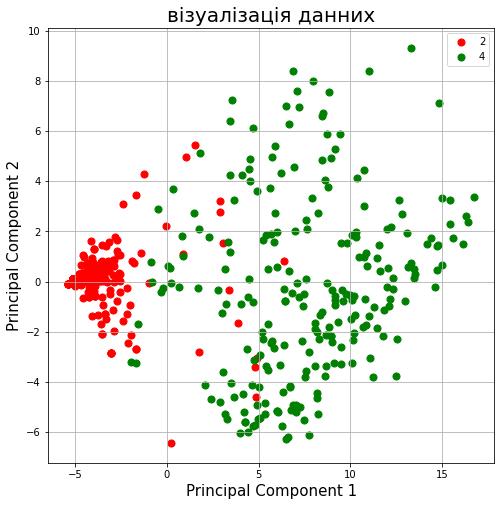

In [11]:

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('візуалізація данних', fontsize = 20)
targets = [2, 4]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf2['Клас-діагноз'] == target
    ax.scatter(finalDf2.loc[indicesToKeep, 'principal component 1'],
               finalDf2.loc[indicesToKeep, 'principal component 2'],
               c = color,
               s = 50)
ax.legend(targets)
ax.grid()


In [12]:
target

4

In [13]:
x_stan = StandardScaler().fit_transform(x)
print(x_stan[:2,:])


[[ 0.26160925  0.75676668  1.69349395  1.77117926 -0.18196482 -0.28587284
  -0.34868607 -0.73450894]
 [-0.74261687 -0.64002594 -0.55614156 -0.42508302 -0.18196482 -0.61354557
  -0.34868607 -0.73450894]]


In [23]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 2, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(x_stan)
y_kmeans

array([0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1,

In [15]:
y_k = copy.copy(y)
y_k[y ==2]=1
y_k[y ==4]=0

# make predictions
expected = list(y_k)
predicted = list(y_kmeans)
# summarize the fit of the model
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))


              precision    recall  f1-score   support

           0       0.97      0.96      0.97       239
           1       0.98      0.99      0.98       443

    accuracy                           0.98       682
   macro avg       0.98      0.97      0.98       682
weighted avg       0.98      0.98      0.98       682

[[230   9]
 [  6 437]]


In [16]:
y_k

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1,

In [17]:
y

array([2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 4, 2, 4, 4, 2, 2, 4, 2, 4, 4, 2,
       2, 4, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 4, 2, 4, 4, 4, 4, 4, 4, 2, 4,
       2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 4, 4, 2, 4, 2, 4, 4,
       2, 2, 4, 2, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 2, 4, 4, 4, 4, 4, 2, 4, 2, 4, 4,
       4, 2, 2, 2, 4, 2, 2, 2, 2, 4, 4, 4, 2, 4, 2, 4, 2, 2, 2, 4, 2, 2,
       2, 2, 2, 2, 2, 2, 4, 2, 2, 4, 2, 2, 4, 2, 4, 4, 2, 2, 4, 2, 2, 4,
       4, 2, 2, 2, 2, 4, 4, 2, 2, 2, 2, 2, 4, 4, 4, 2, 4, 2, 4, 2, 2, 2,
       4, 4, 2, 4, 4, 4, 2, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 2, 2, 2,
       4, 4, 2, 2, 2, 4, 4, 2, 4, 4, 4, 2, 2, 4, 2, 2, 4, 4, 4, 4, 2, 4,
       4, 2, 4, 4, 4, 2, 4, 2, 4, 4, 4, 4, 2, 2, 2, 2, 2, 2, 4, 4, 2, 2,
       4, 2, 4, 4, 4, 2, 2, 2, 2, 4, 4, 4, 4, 4, 2, 4, 4, 4, 2, 4, 2, 4,
       4, 2, 2, 2, 2, 4, 2, 2, 4, 4, 4, 4, 4, 2, 4, 4, 2, 2, 4, 4, 2, 2,
       4, 4, 2, 4, 2, 4, 4, 2, 2, 4, 2, 2, 2, 4, 2,

In [18]:
x_data_kbest = SelectKBest(f_classif, k=3).fit_transform(x_stan, y)#перед дбс сканом
x_data_kbest

array([[ 0.26160925,  1.77117926, -0.73450894],
       [-0.74261687, -0.42508302, -0.73450894],
       [ 1.6005774 ,  0.12398255, -0.73450894],
       ...,
       [ 2.27006148, -0.15055024,  1.36145381],
       [ 0.93109333,  0.12398255,  1.36145381],
       [ 1.6005774 ,  0.39851533,  1.36145381]])

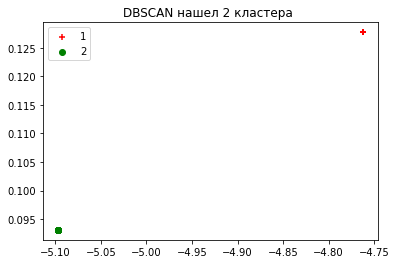

In [41]:
dbscan = DBSCAN(min_samples=70)

# Обучаем
dbscan.fit(x)

# Уменьшаем размерность при помощи метода главных компонент
pca = PCA(n_components=2).fit(x)
pca_2d = pca.transform(x)

# Строим в соответствии с тремя классами
for i in range(0, pca_2d.shape[0]):
    if dbscan.labels_[i] == 0:
        c1 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='r', marker='+')
    elif dbscan.labels_[i] == 1:
        c2 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='g', marker='o')
    

plt.legend([c1, c2], ['1', '2'])
plt.title('DBSCAN нашел 2 кластера ')
plt.show()

In [42]:
dbscan.labels_

array([-1, -1, -1, -1, -1, -1, -1, -1,  0, -1,  0, -1, -1, -1, -1,  0, -1,
       -1, -1, -1, -1,  0, -1, -1, -1,  0,  0, -1, -1, -1, -1, -1, -1,  0,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0,  1, -1,
        1,  1, -1, -1,  0, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1,  0, -1, -1, -1, -1,
       -1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0, -1,
       -1, -1, -1, -1,  1,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1,  0, -1, -1, -1, -1, -1, -1, -1, -1,  0, -1, -1,
       -1, -1, -1, -1, -1

In [43]:
from sklearn import metrics
from sklearn import datasets
import pandas as pd
from sklearn.cluster import KMeans, AgglomerativeClustering, AffinityPropagation, SpectralClustering, DBSCAN

data = df_fill_mean
X = x_stan
y = y_k


algorithms = []
algorithms.append(KMeans(n_clusters=2, random_state=1))
algorithms.append(AffinityPropagation())
algorithms.append(SpectralClustering(n_clusters=2, random_state=1,
                                     affinity='nearest_neighbors'))
algorithms.append(AgglomerativeClustering(n_clusters=2))
algorithms.append(DBSCAN())

data = []
for algo in algorithms:
    algo.fit(X)
    data.append(({
        'ARI': metrics.adjusted_rand_score(y, algo.labels_),
        'AMI': metrics.adjusted_mutual_info_score(y, algo.labels_),
        'Homogenity': metrics.homogeneity_score(y, algo.labels_),
        'Completeness': metrics.completeness_score(y, algo.labels_),
        'V-measure': metrics.v_measure_score(y, algo.labels_)}))

results = pd.DataFrame(data=data, columns=['ARI', 'AMI', 'Homogenity',
                                           'Completeness', 'V-measure', 
                                           'Silhouette'],
                       index=['K-means', 'Affinity', 
                              'Spectral', 'Agglomerative', 'DBSCAN'])

results

C:\Users\Ruslan\Anaconda3-2020.11-Windows-x86_64\lib\site-packages\sklearn\cluster\_affinity_propagation.py:146: FutureWarning: 'random_state' has been introduced in 0.23. It will be set to None starting from 0.25 which means that results will differ at every function call. Set 'random_state' to None to silence this warning, or to 0 to keep the behavior of versions <0.23.
  warnings.warn(("'random_state' has been introduced in 0.23. "
C:\Users\Ruslan\Anaconda3-2020.11-Windows-x86_64\lib\site-packages\sklearn\cluster\_affinity_propagation.py:243: ConvergenceWarning: Affinity propagation did not converge, this model will not have any cluster centers.
  warnings.warn("Affinity propagation did not converge, this model "


,ARI,AMI,Homogenity,Completeness,V-measure,Silhouette
K-means,0.913116,8.386297e-01,8.370279e-01,0.840606,8.388132e-01,NaN
Affinity,0.000000,4.664633e-15,1.371241e-15,1.000000,2.742483e-15,NaN
Spectral,0.982327,9.614082e-01,9.634352e-01,0.959477,9.614519e-01,NaN
Agglomerative,0.902112,8.490882e-01,8.584565e-01,0.840254,8.492576e-01,NaN
DBSCAN,0.683027,6.452607e-01,6.643206e-01,0.628004,6.456519e-01,NaN


In [44]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_data_kbest, y, test_size = 0.33, 
                                                    random_state = 7)
x_train

array([[-0.74261687, -0.69961581, -0.73450894],
       [-0.74261687, -0.69961581, -0.73450894],
       [-0.74261687, -0.69961581, -0.73450894],
       ...,
       [-0.40787483,  0.39851533, -0.73450894],
       [-0.74261687, -0.69961581, -0.73450894],
       [-0.74261687, -0.69961581, -0.73450894]])

In [45]:
from sklearn.linear_model import LinearRegression
regModel = LinearRegression()
regModel.fit(x_train, y_train)

b_0 = regModel.intercept_
b_1 = regModel.coef_
print(b_0, b_1)
y_pr_train = regModel.predict(x_train)
y_pr_test = regModel.predict(x_test)

0.35043988269794735 [ 4.21194047e-16 -3.51291982e-18  4.77107715e-01]


In [46]:
y_pr_train

array([-1.11022302e-16, -1.11022302e-16, -1.11022302e-16,  1.00000000e+00,
       -1.11022302e-16, -1.11022302e-16, -1.11022302e-16, -1.11022302e-16,
       -1.11022302e-16, -1.11022302e-16, -1.11022302e-16, -1.11022302e-16,
        1.00000000e+00, -1.11022302e-16,  1.00000000e+00, -1.11022302e-16,
        1.00000000e+00, -1.11022302e-16,  1.00000000e+00,  1.00000000e+00,
       -1.11022302e-16,  1.00000000e+00, -1.11022302e-16,  1.00000000e+00,
        1.00000000e+00,  1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
       -1.11022302e-16,  1.00000000e+00, -1.11022302e-16, -1.11022302e-16,
        1.00000000e+00,  1.00000000e+00, -1.11022302e-16,  5.55111512e-17,
        1.00000000e+00,  1.00000000e+00, -1.11022302e-16,  1.00000000e+00,
        1.00000000e+00, -1.11022302e-16, -1.11022302e-16,  1.00000000e+00,
        1.00000000e+00,  1.00000000e+00, -1.11022302e-16, -1.11022302e-16,
        1.66533454e-16, -1.11022302e-16,  1.00000000e+00, -1.11022302e-16,
        1.00000000e+00, -

In [48]:
print('Mean Absolute Error train:', mean_absolute_error(y_train, y_pr_train))
print('Mean Absolute Error test:', mean_absolute_error(y_test, y_pr_test))
print('Root mean squared error train: ', mean_squared_error(y_train, y_pr_train))
print('Root mean squared error test: ', mean_squared_error(y_test, y_pr_test))
print('R2 score train: ',regModel.score(x_train, y_train))
print('R2 score test: ',regModel.score(x_test, y_test))

Mean Absolute Error train: 3.3684069179142634e-16
Mean Absolute Error test: 3.47804381165757e-16
Root mean squared error train:  2.6193323008559174e-31
Root mean squared error test:  2.7389791662195253e-31
R2 score train:  1.0
R2 score test:  1.0


In [49]:
# make predictions
expected = list(y_train)
predicted = list(y_pr_train)
# summarize the fit of the model
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [50]:
y_train=y_train.astype('int')
y_test=y_test.astype('int')

In [30]:
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression()
logistic_model.fit(x_train, y_train)

y_test_pred = logistic_model.predict(x_test)
y_predicted = logistic_model.predict(x_data_kbest)

In [31]:
y_predicted

array([2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 4, 2, 4, 4, 2, 2, 4, 2, 4, 4, 2,
       2, 4, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 4, 2, 4, 4, 4, 4, 4, 4, 2, 4,
       2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 4, 4, 2, 4, 2, 4, 4,
       2, 2, 4, 2, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 2, 4, 4, 4, 4, 4, 2, 4, 2, 4, 4,
       4, 2, 2, 2, 4, 2, 2, 2, 2, 4, 4, 4, 2, 4, 2, 4, 2, 2, 2, 4, 2, 2,
       2, 2, 2, 2, 2, 2, 4, 2, 2, 4, 2, 2, 4, 2, 4, 4, 2, 2, 4, 2, 2, 4,
       4, 2, 2, 2, 2, 4, 4, 2, 2, 2, 2, 2, 4, 4, 4, 2, 4, 2, 4, 2, 2, 2,
       4, 4, 2, 4, 4, 4, 2, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 2, 2, 2,
       4, 4, 2, 2, 2, 4, 4, 2, 4, 4, 4, 2, 2, 4, 2, 2, 4, 4, 4, 4, 2, 4,
       4, 2, 4, 4, 4, 2, 4, 2, 4, 4, 4, 4, 2, 2, 2, 2, 2, 2, 4, 4, 2, 2,
       4, 2, 4, 4, 4, 2, 2, 2, 2, 4, 4, 4, 4, 4, 2, 4, 4, 4, 2, 4, 2, 4,
       4, 2, 2, 2, 2, 4, 2, 2, 4, 4, 4, 4, 4, 2, 4, 4, 2, 2, 4, 4, 2, 2,
       4, 4, 2, 4, 2, 4, 4, 2, 2, 4, 2, 2, 2, 4, 2,

In [32]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
# оценка модели
mae = mean_absolute_error(y, y_predicted)
rmse = mean_squared_error(y, y_predicted)
r2 = r2_score(y, y_predicted)

print('Mean Absolute Error:', mae)
print('Root mean squared error: ', rmse)
print('R2 score: ', r2)

Mean Absolute Error: 0.0
Root mean squared error:  0.0
R2 score:  1.0


In [33]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_test_pred))

[[142   0]
 [  0  84]]


In [34]:
y_test

array([4, 4, 2, 4, 4, 2, 4, 4, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 4,
       4, 2, 2, 2, 4, 2, 2, 2, 4, 2, 4, 2, 2, 4, 2, 2, 2, 2, 4, 4, 4, 2,
       4, 4, 2, 2, 4, 2, 4, 4, 2, 2, 4, 2, 4, 4, 4, 2, 2, 2, 2, 2, 4, 4,
       2, 2, 4, 2, 2, 4, 2, 2, 4, 2, 2, 2, 4, 4, 4, 4, 2, 4, 2, 2, 2, 2,
       2, 2, 4, 4, 4, 2, 2, 2, 2, 2, 4, 4, 2, 2, 2, 4, 2, 2, 2, 2, 2, 4,
       4, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 4, 2, 2, 2, 2, 4,
       2, 2, 2, 4, 4, 2, 4, 2, 2, 4, 4, 2, 4, 2, 2, 4, 2, 2, 2, 4, 4, 2,
       4, 4, 4, 2, 4, 4, 2, 2, 4, 2, 4, 2, 2, 4, 2, 2, 2, 2, 4, 4, 2, 4,
       2, 2, 2, 2, 2, 4, 2, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 2, 4, 4, 2,
       2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 4, 4, 2, 4, 4, 4, 2, 4, 2, 2, 2, 2,
       4, 2, 2, 4, 2, 2])

In [35]:
y_k = copy.copy(y)
y_k[y ==4] = 1
y_k[y ==2] = 0


# make predictions
expected = list(y_test)
predicted = list(y_test_pred)
# summarize the fit of the model
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

              precision    recall  f1-score   support

           2       1.00      1.00      1.00       142
           4       1.00      1.00      1.00        84

    accuracy                           1.00       226
   macro avg       1.00      1.00      1.00       226
weighted avg       1.00      1.00      1.00       226

[[142   0]
 [  0  84]]


In [36]:
y_test_pred

array([4, 4, 2, 4, 4, 2, 4, 4, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 4,
       4, 2, 2, 2, 4, 2, 2, 2, 4, 2, 4, 2, 2, 4, 2, 2, 2, 2, 4, 4, 4, 2,
       4, 4, 2, 2, 4, 2, 4, 4, 2, 2, 4, 2, 4, 4, 4, 2, 2, 2, 2, 2, 4, 4,
       2, 2, 4, 2, 2, 4, 2, 2, 4, 2, 2, 2, 4, 4, 4, 4, 2, 4, 2, 2, 2, 2,
       2, 2, 4, 4, 4, 2, 2, 2, 2, 2, 4, 4, 2, 2, 2, 4, 2, 2, 2, 2, 2, 4,
       4, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 4, 2, 2, 2, 2, 4,
       2, 2, 2, 4, 4, 2, 4, 2, 2, 4, 4, 2, 4, 2, 2, 4, 2, 2, 2, 4, 4, 2,
       4, 4, 4, 2, 4, 4, 2, 2, 4, 2, 4, 2, 2, 4, 2, 2, 2, 2, 4, 4, 2, 4,
       2, 2, 2, 2, 2, 4, 2, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 2, 4, 4, 2,
       2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 4, 4, 2, 4, 4, 4, 2, 4, 2, 2, 2, 2,
       4, 2, 2, 4, 2, 2])

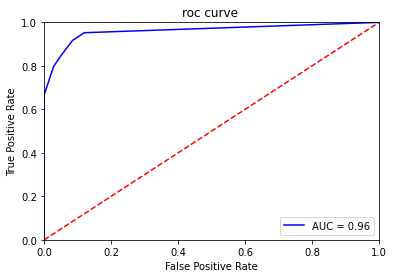

In [51]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = (x_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('roc curve ')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()